In [2]:
!mkdir -p data figs
!pip install -q pandas numpy matplotlib scipy

In [3]:
!curl -L -o data/E0.csv https://www.football-data.co.uk/mmz4281/2425/E0.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  192k  100  192k    0     0   150k      0  0:00:01  0:00:01 --:--:--  150k


In [4]:
import pandas as pd, numpy as np, scipy.stats as ss, matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/E0.csv', usecols=['HTR', 'FTR']).dropna()

table = pd.crosstab(df.HTR, df.FTR).reindex(index=['H','D','A'], columns=['H','D','A'])

lead_to_win = table.at['H','H'] / table.loc['H'].sum()   # home ahead → win
trail_to_win = table.at['A','A'] / table.loc['A'].sum()  # away ahead → win

chi2, p, dof, _ = ss.chi2_contingency(table)

print(table, '\n')
print(f'Home lead → FT win: {lead_to_win:.2%}')
print(f'Away lead → FT win: {trail_to_win:.2%}')
print(f'Chi² = {chi2:.2f},  p = {p:.4f}')

FTR   H   D   A
HTR            
H    97  30  15
D    44  45  46
A    14  18  71 

Home lead → FT win: 68.31%
Away lead → FT win: 68.93%
Chi² = 112.89,  p = 0.0000


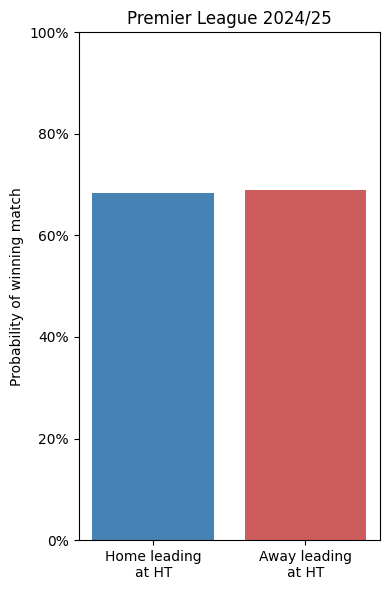

In [6]:
rates = [lead_to_win, trail_to_win]
labels = ['Home leading\nat HT', 'Away leading\nat HT']

plt.figure(figsize=(4,6))
plt.bar(labels, rates, color=['steelblue','indianred'])
plt.ylim(0,1)
plt.ylabel('Probability of winning match')
plt.title('Premier League 2024/25')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.tight_layout()
plt.savefig('figs/ht_lead_conversion.png', dpi=300)
plt.show()